In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


In [4]:
df=pd.read_csv("/content/Crop_recommendation.csv")
df.sample(5)

,N,P,K,temperature,humidity,ph,rainfall,label
905,31,25,38,24.962732,92.405014,6.497367,109.416919,pomegranate
1969,100,48,17,23.780512,83.038788,7.827878,66.265559,cotton
435,17,73,18,19.501122,34.510866,5.632353,197.375265,pigeonpeas
638,36,43,22,27.826843,87.166791,6.389882,58.372498,mungbean
301,25,70,16,19.634743,18.907056,5.759237,106.359818,kidneybeans


In [5]:
df.shape

(2200, 8)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
df["temperature"]=df["temperature"].astype(int)
df['humidity']=df['humidity'].astype(int)
df['ph']=df['ph'].astype(int)
df['rainfall']=df['rainfall'].astype(int)

In [8]:
df.dtypes

,0
N,int64
P,int64
K,int64
temperature,int64
humidity,int64
ph,int64
rainfall,int64
label,object


In [9]:
df.isnull().sum()

,0
N,0
P,0
K,0
temperature,0
humidity,0
ph,0
rainfall,0
label,0


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
N,2200.0,50.551818,36.917334,0.0,21.0,37.0,84.25,140.0
P,2200.0,53.362727,32.985883,5.0,28.0,51.0,68.00,145.0
K,2200.0,48.149091,50.647931,5.0,20.0,32.0,49.00,205.0
temperature,2200.0,25.120000,5.062696,8.0,22.0,25.0,28.00,43.0
humidity,2200.0,70.976364,22.263427,14.0,60.0,80.0,89.00,99.0
ph,2200.0,5.950000,0.824395,3.0,5.0,6.0,6.00,9.0
rainfall,2200.0,102.970000,54.948949,20.0,64.0,94.0,124.00,298.0


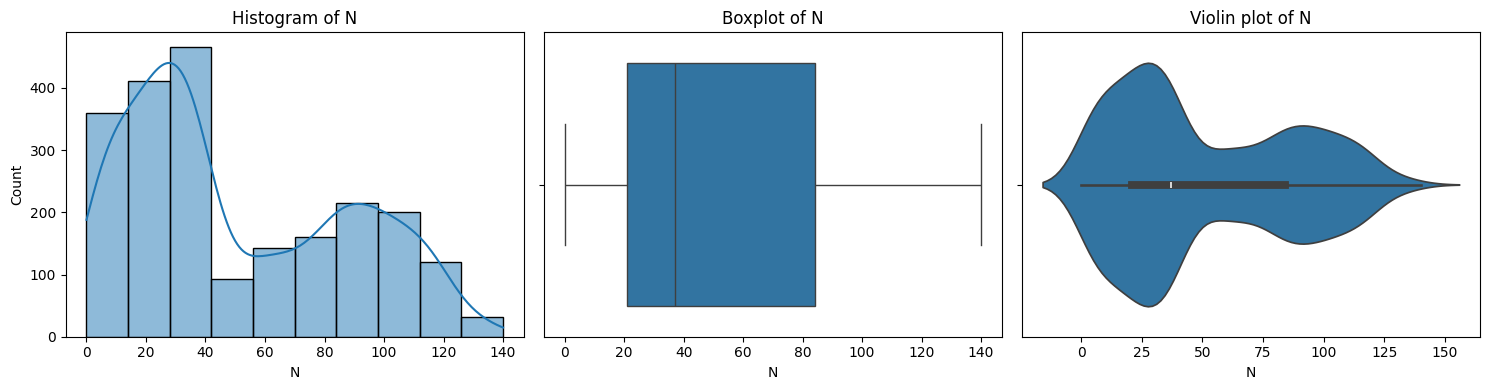

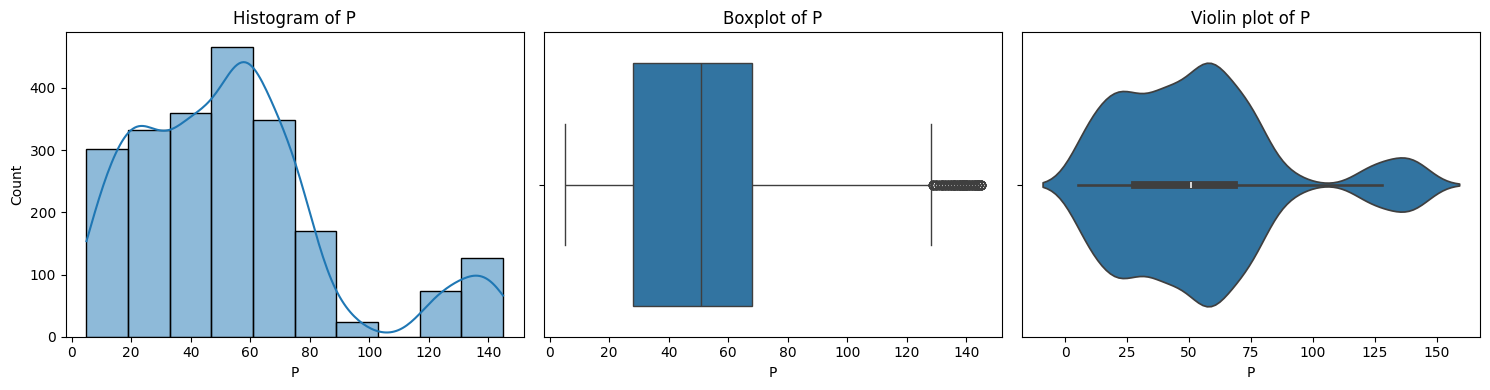

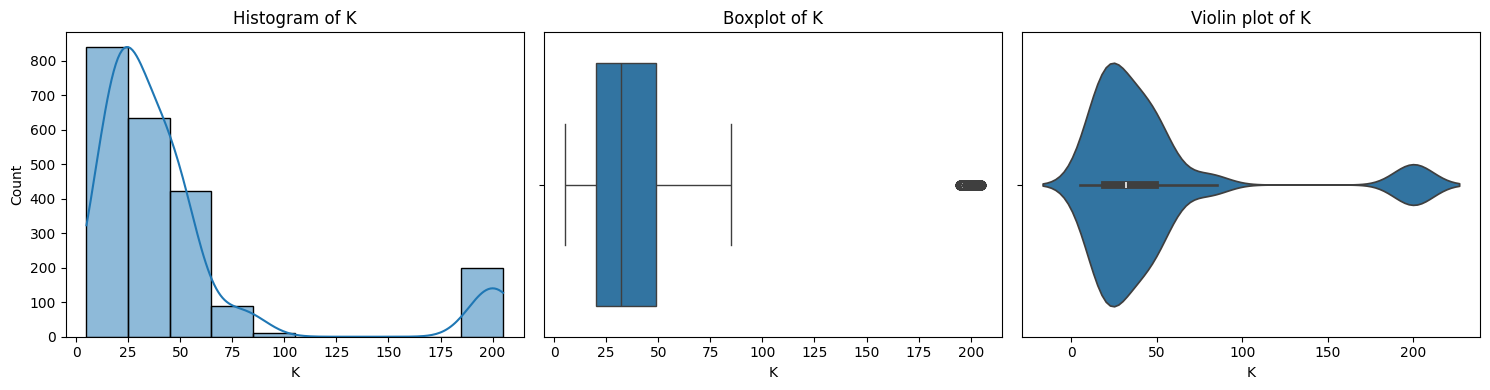

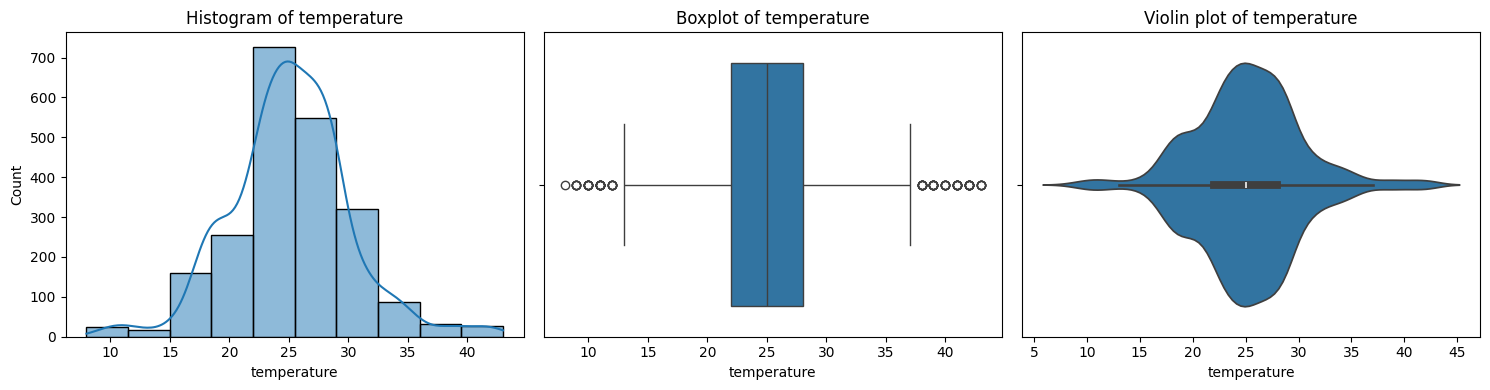

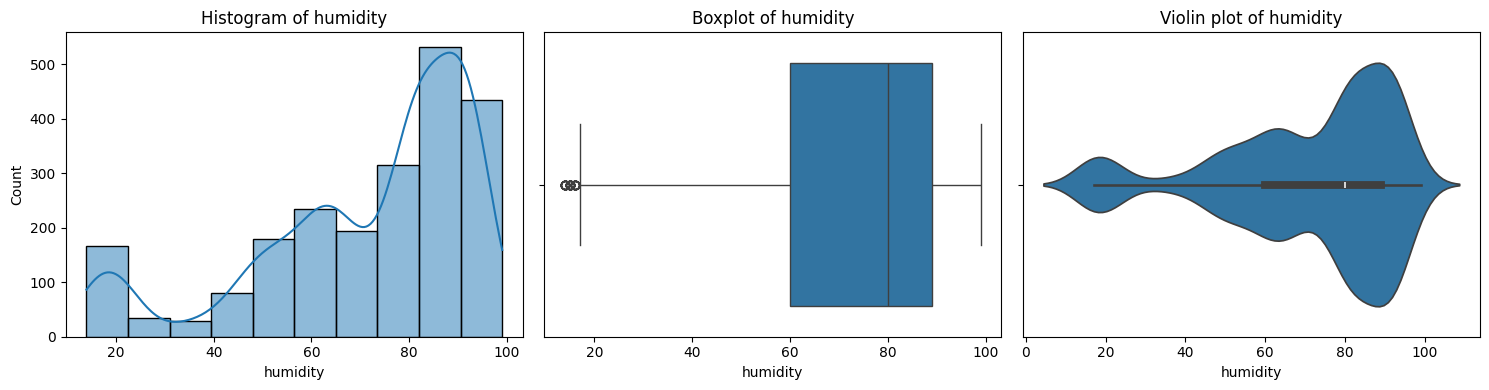

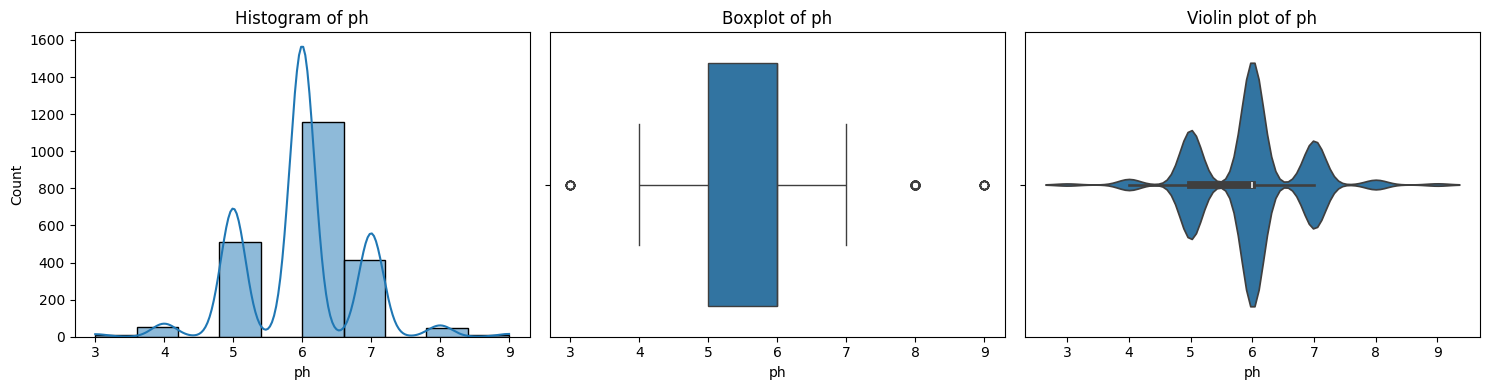

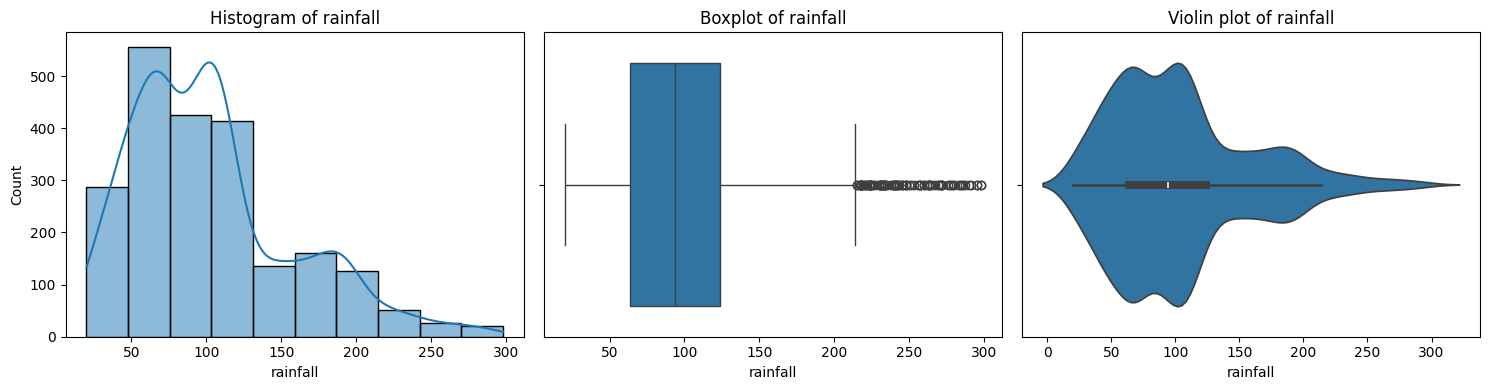

In [11]:
features=df.columns[:-1]
for feature in features:
    plt.figure(figsize=(15, 4))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[feature], kde=True, bins=10)
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')

    # Violin plot
    plt.subplot(1, 3, 3)
    sns.violinplot(x=df[feature])
    plt.title(f'Violin plot of {feature}')

    plt.tight_layout()
    plt.show()

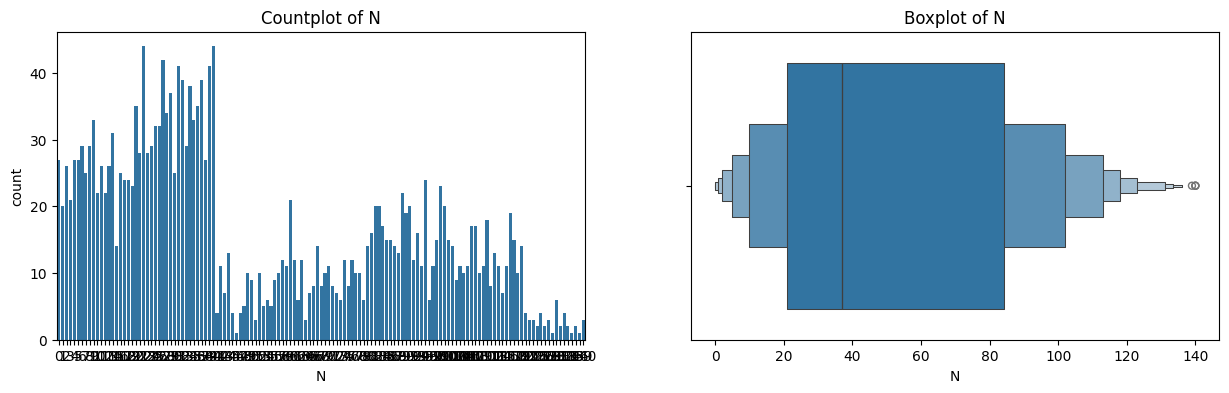

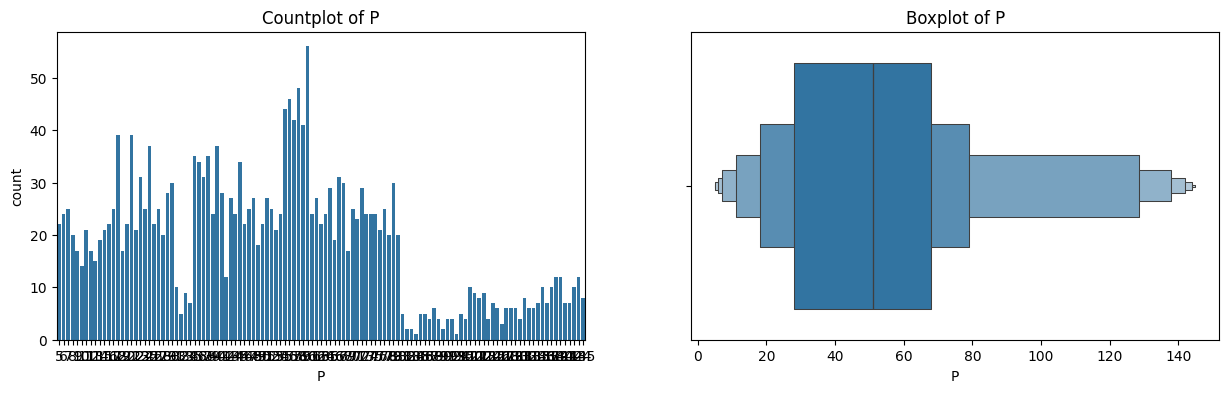

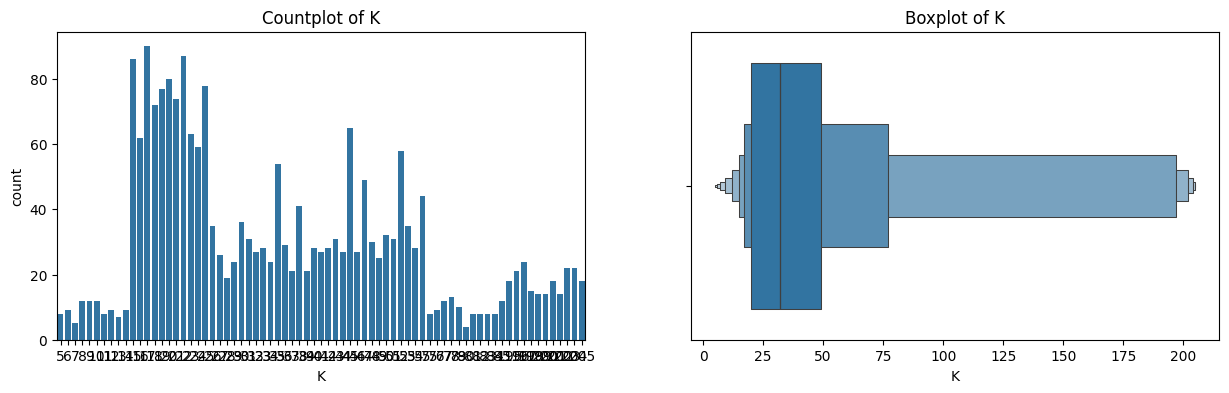

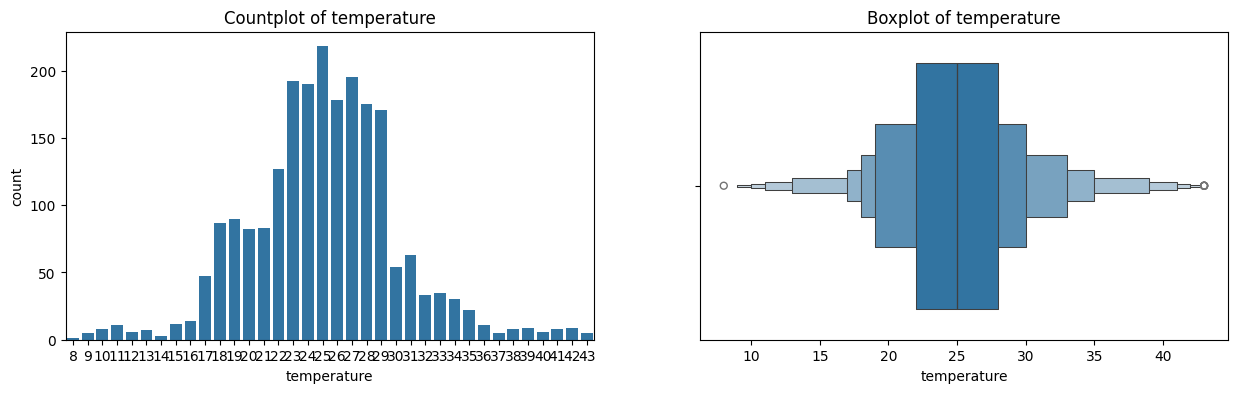

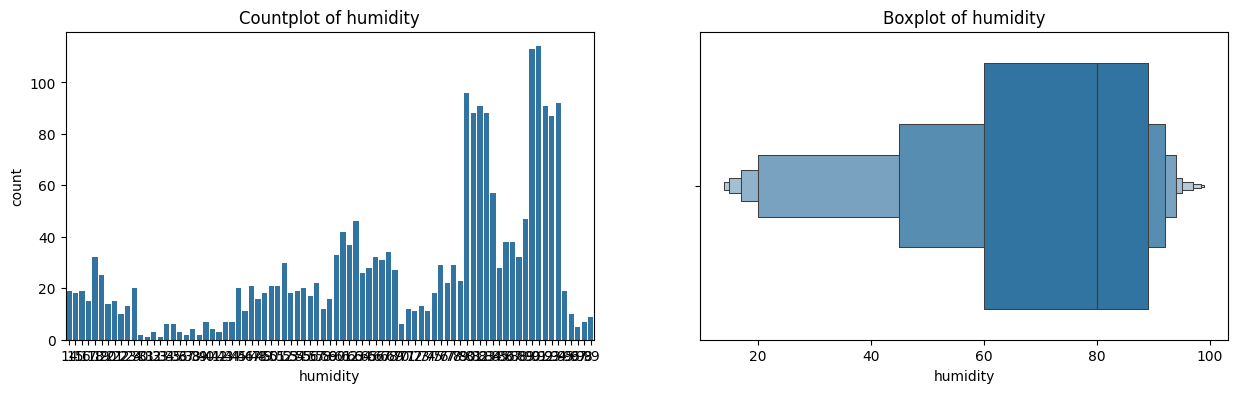

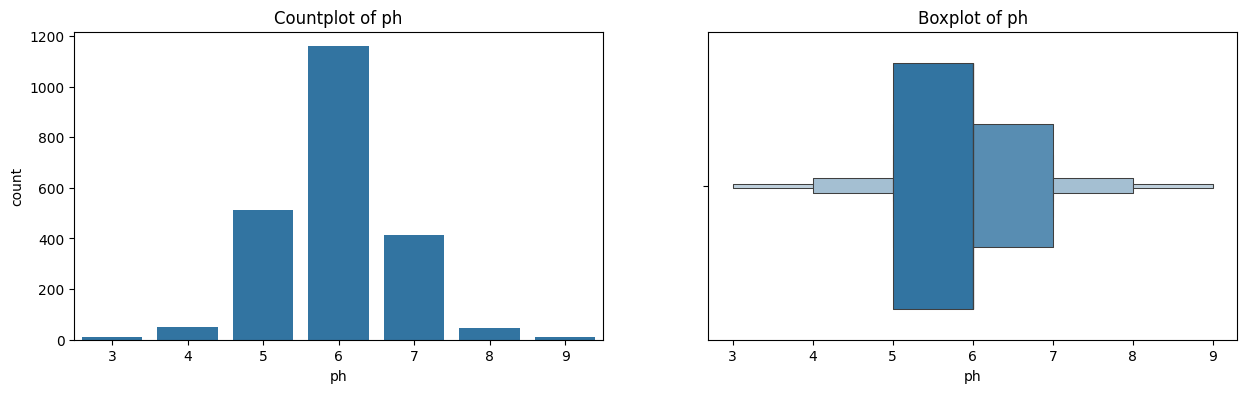

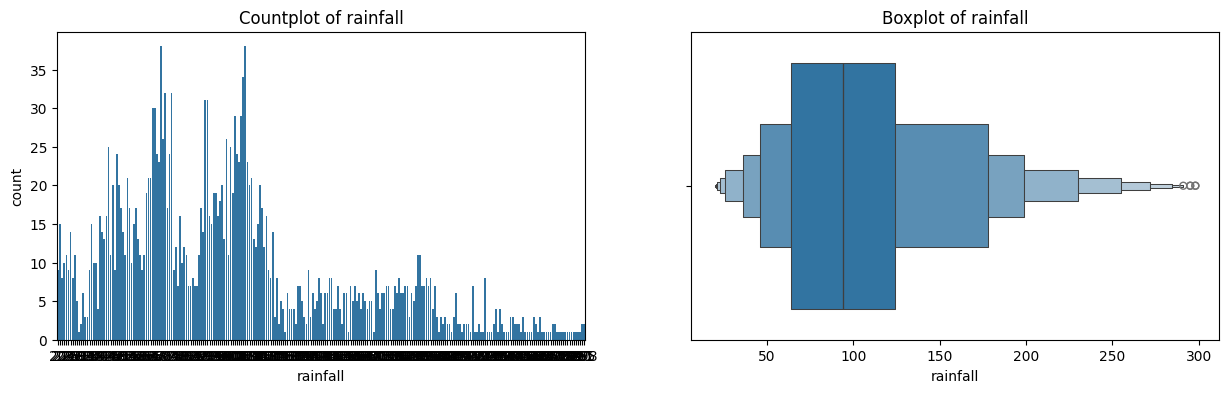

In [16]:
features=df.columns[:-1]
for feature in features:
  plt.figure(figsize=(15,4))

  #count plot
  plt.subplot(1,2,1)
  sns.countplot(x=df[feature])
  plt.title(f'Countplot of {feature}')

  #boxen plot
  plt.subplot(1,2,2)
  sns.boxenplot(x=df[feature])
  plt.title(f'Boxplot of {feature}')



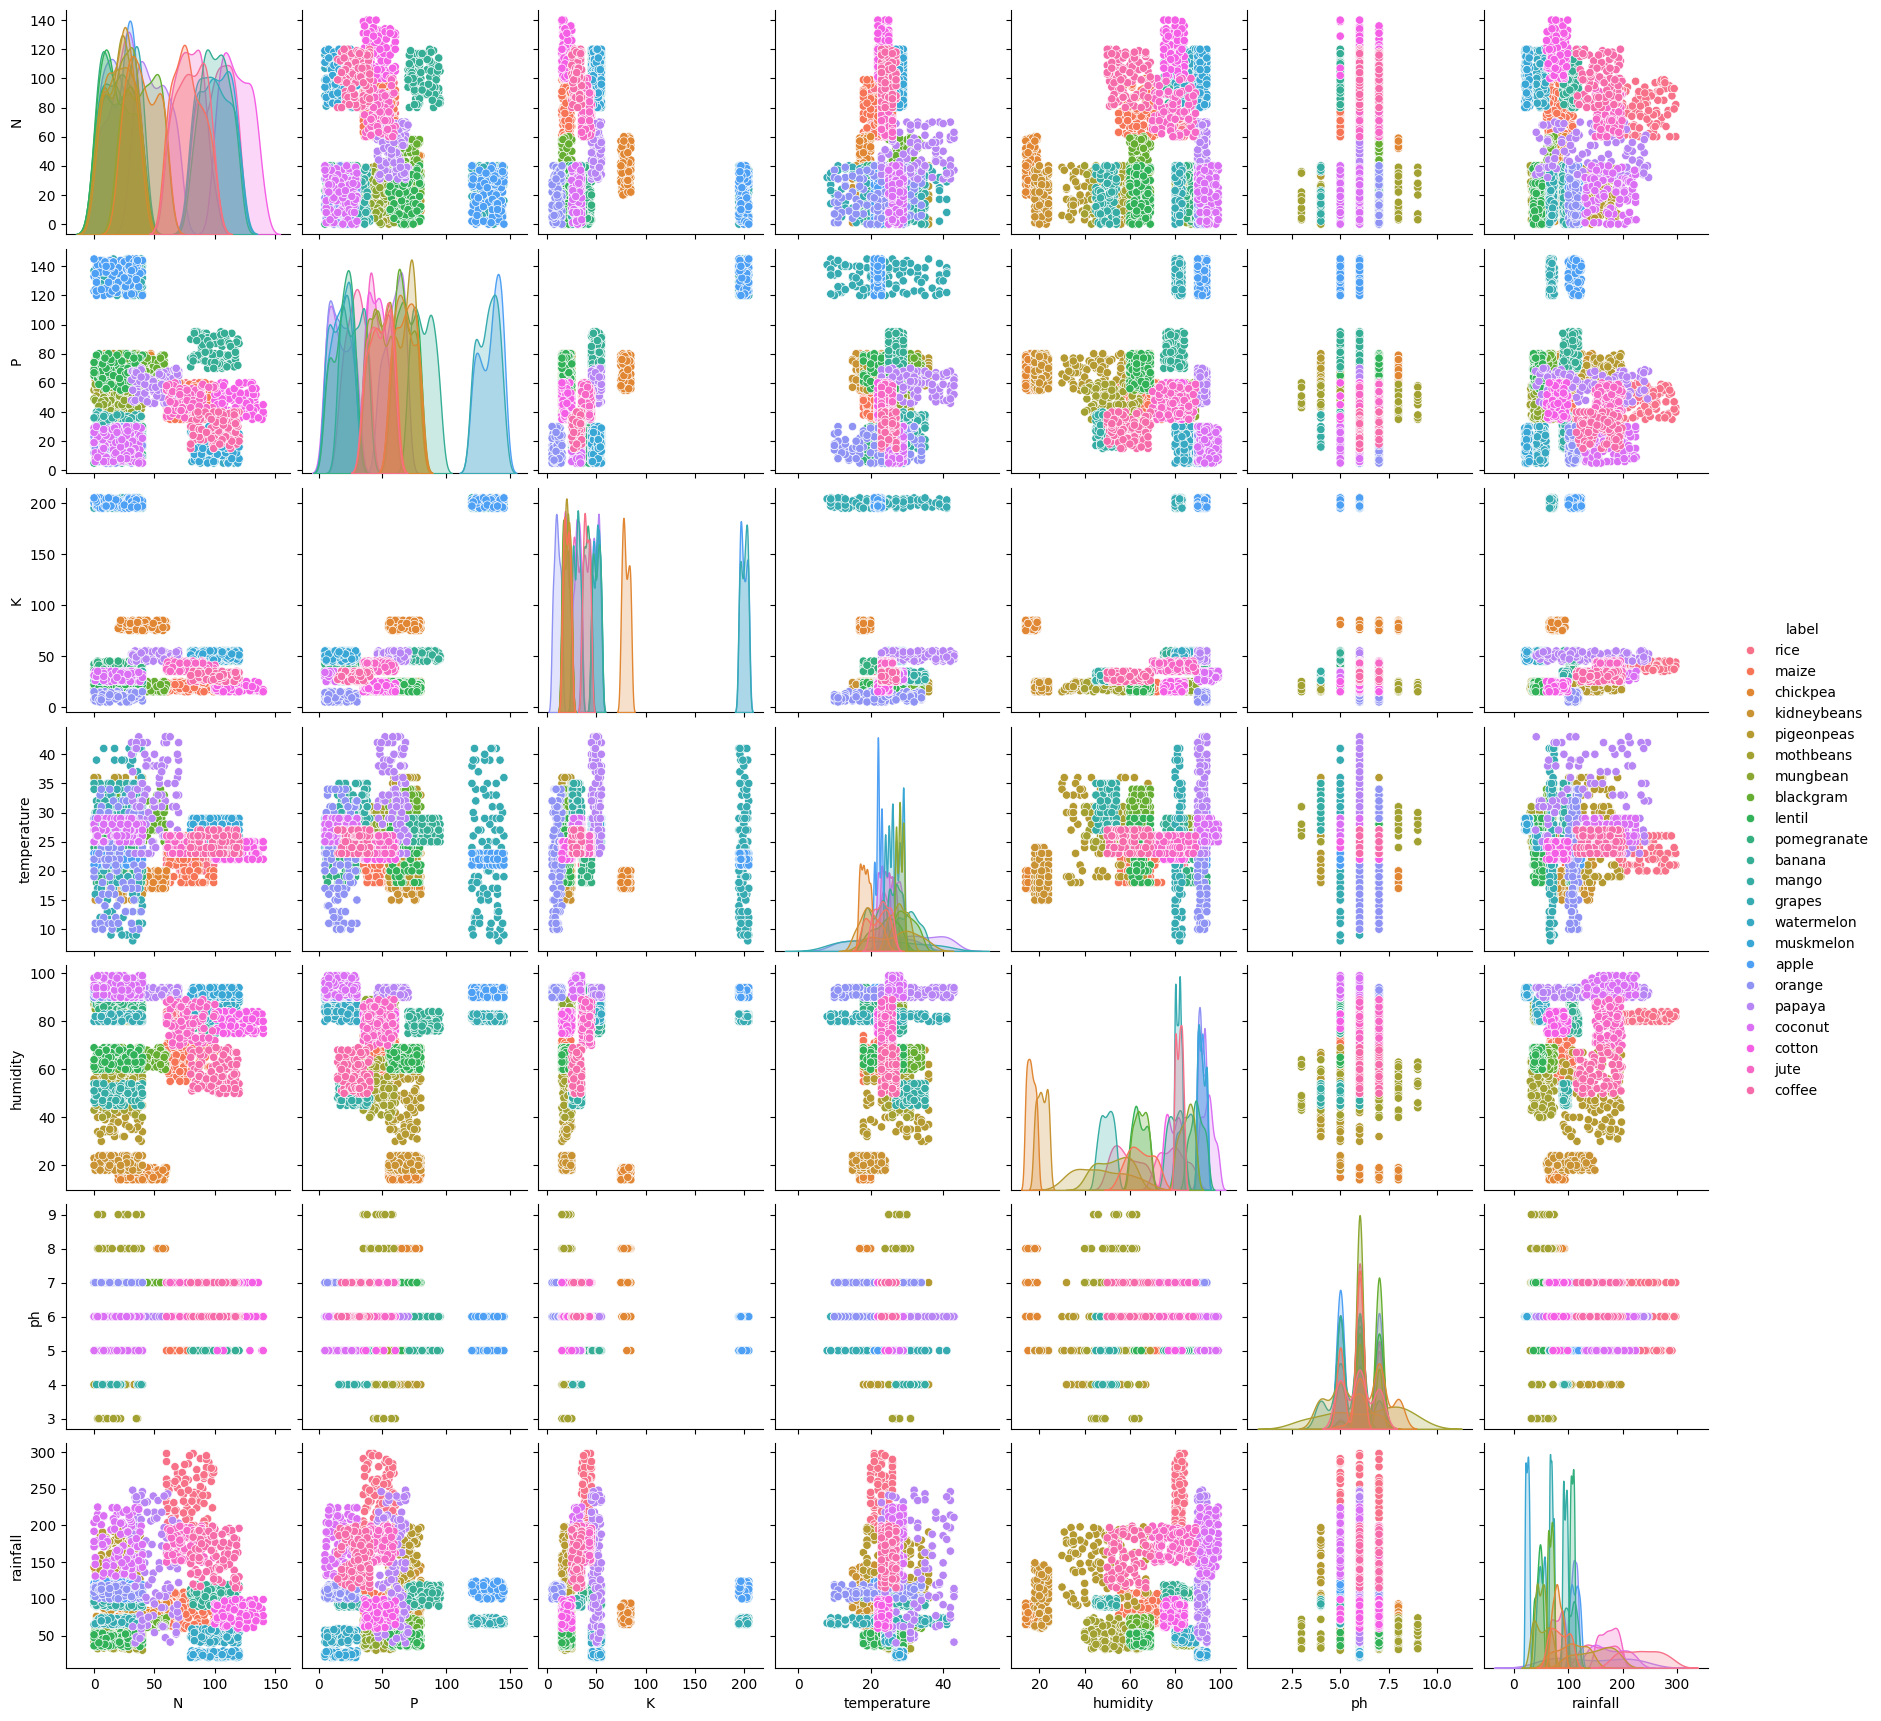

In [18]:
sns.pairplot(df,hue="label")

<Axes: >

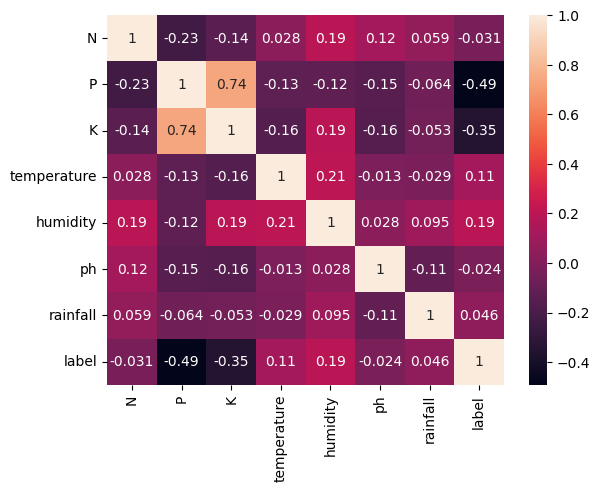

In [23]:
le=LabelEncoder()
df["label"]=le.fit_transform(df["label"])
sns.heatmap(df.corr(),annot=True)

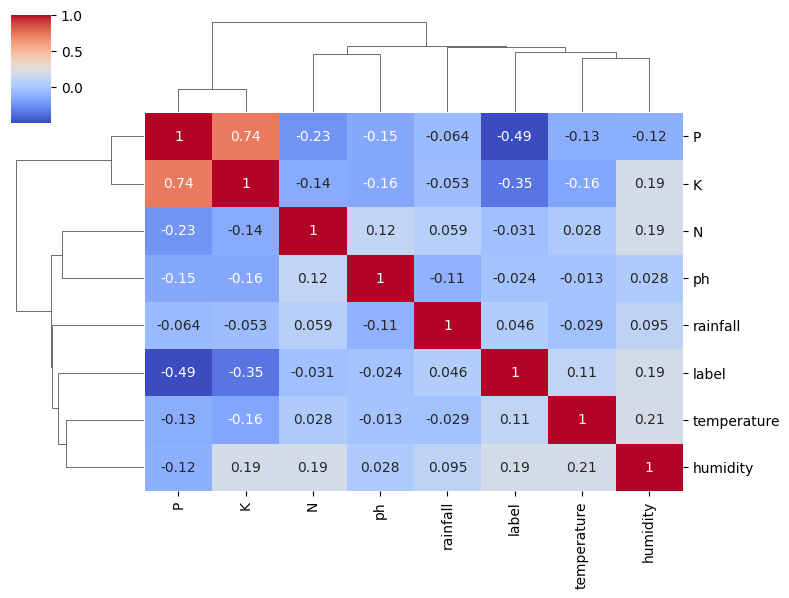

In [25]:
sns.clustermap(df.corr(), annot=True, cmap='coolwarm', figsize=(8, 6))


In [45]:
import os
print(os.listdir())


['.config', 'crop_prediction_model.pkl', 'Fertilizer Prediction.csv', 'Crop_recommendation.csv', 'sample_data']


In [15]:

X = df.drop("label", axis=1)
y = df["label"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = DecisionTreeClassifier()

model.fit(X_train, y_train)


with open("crop_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

train_accuracy = model.score(X_train, y_train)
test_accuracy = model.score(X_test, y_test)

print(f"Train Accuracy: {train_accuracy}")
print(f"Test Accuracy: {test_accuracy}")


Train Accuracy: 1.0
Test Accuracy: 0.990909090909091


In [16]:
import pickle
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit(df['label'])

with open("crop_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)


In [53]:
le = LabelEncoder()
le.fit(df['label'])

with open("crop_prediction_model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("Classes in LabelEncoder after fitting:", le.classes_)


Classes in LabelEncoder after fitting: ['apple' 'banana' 'blackgram' 'chickpea' 'coconut' 'coffee' 'cotton'
 'grapes' 'jute' 'kidneybeans' 'lentil' 'maize' 'mango' 'mothbeans'
 'mungbean' 'muskmelon' 'orange' 'papaya' 'pigeonpeas' 'pomegranate'
 'rice' 'watermelon']


In [58]:
with open("crop_prediction_model.pkl", "rb") as f:
    model = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

features = [99, 6, 46, 28.614751, 94.222530, 6.396379, 28.985742]
predicted_label_encoded = model.predict([features])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [59]:
print("Predicted label encoded:", predicted_label_encoded)


Predicted label encoded: ['muskmelon']
